# Project 1 - DataQuest - Introduction to Python

## Cleanning Data

For this project, I'm going to work as data analysts for a company that builds Android and iOS mobile apps. 

The goal is to analyze data to help our developers understand what type of apps are likely to attract more users.
To do this, I'll need to collect and analyze data about mobile apps available on Google Play and the App Store.

Collecting data for over 4 million apps requires a significant amount of time and money, 

> Number of apps available in leading app stores as of 3rd quarter 2019  ([Link](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/))

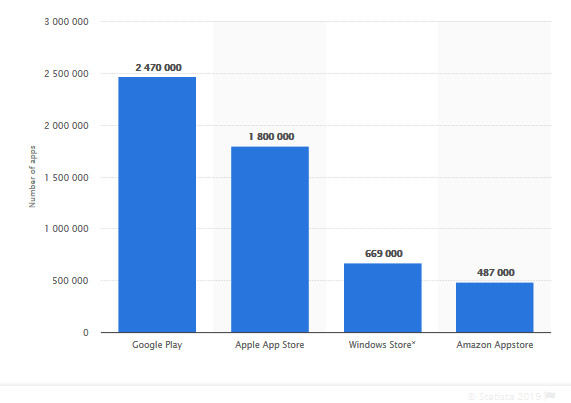


To avoid spending resources on collecting new data ourselves, I should first try to see if I can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for my goals (both find in Kaggle):


* A **data set** containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the data set directly from this [link](https://www.kaggle.com/lava18/google-play-store-apps).
* A **data set** containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from this [link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).




In [1]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [2]:
import csv
from csv import reader
from csv import writer

In [3]:
# AppStore file has Asia char 
import codecs

In [4]:
# TO indentifier Asia char
import re

In [5]:
# To use sort funcion
import operator

In [6]:
# to create a free list
import copy

In [7]:
opened_ios = codecs.open(r'C:\Users\Sandra\Documents\Dataquest\AppleStore.csv','r','utf-8')

In [8]:
opened_gpl = codecs.open(r'C:\Users\Sandra\Documents\Dataquest\googleplaystore.csv','r','utf-8')

In [9]:
read_ios = reader(opened_ios)
read_gpl = reader(opened_gpl)


In [10]:
data_ios_all = list(read_ios)
data_gpl_all = list(read_gpl)

In [11]:
opened_gpl.close()
opened_ios.close()

In [12]:
data_ios_header = data_ios_all[0]
data_gpl_header = data_gpl_all[0]


In [13]:
#exbindo dados do arquivo do ios (app_store)

explore_data (data_ios_all[1:], 0, 5, rows_and_columns=True)

['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['4', '282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


['5', '282935706', 'Bible', '92774400', 'USD', '0', '985920', '5320', '4.5', '5', '7.5.1', '4+', 'Reference', '37', '5', '45', '1']


Number of rows: 7197
Number of columns: 17


In [14]:
# exibindo dados do arquivo do GPL (google_play)
explore_data(data_gpl_all[1:], 0, 5, rows_and_columns=True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


Number of rows: 10841
Number of columns: 13


In [15]:
# verificando os nomes das coluns no arquivo do ios

for n in range(len(data_ios_header)):
    print(n, ' ', data_ios_header[n], '=', data_ios_all[1][n], ' ',  type(data_ios_all[1][n]))

0    = 1   <class 'str'>
1   id = 281656475   <class 'str'>
2   track_name = PAC-MAN Premium   <class 'str'>
3   size_bytes = 100788224   <class 'str'>
4   currency = USD   <class 'str'>
5   price = 3.99   <class 'str'>
6   rating_count_tot = 21292   <class 'str'>
7   rating_count_ver = 26   <class 'str'>
8   user_rating = 4   <class 'str'>
9   user_rating_ver = 4.5   <class 'str'>
10   ver = 6.3.5   <class 'str'>
11   cont_rating = 4+   <class 'str'>
12   prime_genre = Games   <class 'str'>
13   sup_devices.num = 38   <class 'str'>
14   ipadSc_urls.num = 5   <class 'str'>
15   lang.num = 10   <class 'str'>
16   vpp_lic = 1   <class 'str'>


In [16]:
# verificando os nomes das colunas no arquivo do google_pay (GPL)

for n in range(len(data_gpl_all[0])):
    print(n, ' ', data_gpl_all[0][n], '=', data_gpl_all[1][n], ' ',  type(data_gpl_all[1][n]))

0   App = Photo Editor & Candy Camera & Grid & ScrapBook   <class 'str'>
1   Category = ART_AND_DESIGN   <class 'str'>
2   Rating = 4.1   <class 'str'>
3   Reviews = 159   <class 'str'>
4   Size = 19M   <class 'str'>
5   Installs = 10,000+   <class 'str'>
6   Type = Free   <class 'str'>
7   Price = 0   <class 'str'>
8   Content Rating = Everyone   <class 'str'>
9   Genres = Art & Design   <class 'str'>
10   Last Updated = January 7, 2018   <class 'str'>
11   Current Ver = 1.0.0   <class 'str'>
12   Android Ver = 4.0.3 and up   <class 'str'>


We only build apps for people who speak western languages and that are free to download and install, and our main source of revenue consists of in-app ads. 

This means that we need to appy a filter for free payment and western language (no Asian app will be considered)


In [17]:
# ---Payment filter for free
def payment_free(pay_met):
    fl_def_non_free = False
    
    if pay_met.replace('.', '', 1).isdigit():
        pay_met_value = float(pay_met)
        if pay_met_value != 0:
            fl_def_non_free = True  
        return fl_def_non_free
                
# ---Payment filter for string 'free' 
    fl_def_non_free = True
    if ('free' in pay_met.lower()):
        fl_def_non_free = False
        
    return fl_def_non_free
       

In [18]:
# Asian Charateres in String

def non_asc(str_asc):
    fl_def_non_asc = False
        
    for a in range(len(str_asc)):
        if re.search("[\uac00-\ud7a3]", str_asc[a]) or re.search("[\u3040-\u30ff]", str_asc[a]) or re.search("[\u4e00-\u9FFF]", str_asc[a]):
            a = len(str_asc) + 1
            fl_def_non_asc = True
                    
                
    return fl_def_non_asc             


A rotina abaixo irá:
> aplicar os filtos nos arquivos de entrada 

> Separar os arquivos de entrada entre:
        - registros removidos (rem_data)
        - registros selecionados (out_data)
        - registros duplicados se houver (dup_data)
        

In [19]:
def clean_data(list_data, colunm_asc, colunm_pay):
    ac_non_asc = 0
    ac_non_free = 0
    ac_dup = 0
     
# rem_data = error data (non English or non Free)  and flg_data = string's and flags
    rem_data = []
    flg_data = []
    
    dict_dup = {}
    
    
# dup_data = valid data but in duplicity APP
    dup_data = []

# out_data = output data
    out_data = []
    out_data.append(list_data[0])

  
    for list_value in list_data[1:]:
        str_asc = list_value[colunm_asc]
        pay_met = list_value[colunm_pay]
        
                          
 #  Asia characteres filter
        fl_non_asc = non_asc(str_asc)                            
                        
# ---Payment filter for 0 or free                
        fl_non_free = payment_free(pay_met)
                    
# --- identify duplicity for future analys 
#  este comando é muito mais rápido que um for loop
        fl_dup = False
        if fl_non_asc is False and fl_non_free is False:
            if str_asc in dict_dup:
                fl_dup = True
                dict_dup[str_asc] += 1
                dup_data.append(list_value)
            else:
                dict_dup[str_asc] = 1 
                           
                                       
# constuindo nova string 
        if fl_non_asc or fl_non_free:
            rem_data.append(list_value)
            list_flag = [str_asc, fl_non_asc, pay_met, fl_non_free]
            flg_data.append(list_flag)
            
        elif fl_dup is False:
            out_data.append(list_value) 
            
# para total de controle            
        if fl_non_asc:
            ac_non_asc += 1
        elif fl_non_free:
            ac_non_free += 1
                    
# retirar duplicidade do arquivo de saída
    for list_value in out_data[1:]:
        str_asc = list_value[colunm_asc]
        if dict_dup[str_asc] > 1:
            dup_data.append(list_value)
            out_data.remove(list_value)
            ac_dup += 1
        
           
    print ('Total for no Englis app: ', ac_non_asc)
    print ('total for no Free app: ', ac_non_free)
    print ('Total for String Duplicity: ', ac_dup)
    print ('\n')
    print ('Total Start:', len(list_data))
    print ('Total Remove error:', len(rem_data))
    print ('Total Remove Dupl:', len(dup_data))
    print ('Total End:', len(out_data))
         
    return out_data, rem_data, flg_data, dup_data


In [20]:
# arquivos para ios

data_ios, data_ios_remove, data_ios_flag, data_ios_dup = clean_data(data_ios_all, 2, 5)  

Total for no Englis app:  1049
total for no Free app:  2957
Total for String Duplicity:  2


Total Start: 7198
Total Remove error: 4006
Total Remove Dupl: 4
Total End: 3188


In [21]:
print ('Dados válidos para Ios')
for i in range(1,3):
    print (data_ios[i])
    
print ('\n', 'Dados invalidos Ios')   
for i in range(0,3):
    print (data_ios_remove[i])
    
print ('\n', 'Flags apurados Ios')   
for i in range(0,3):
    print (data_ios_flag[i])
    
print ('\n', 'Dupplicados')   
for i in range(0,3):
    print (data_ios_dup[i])


Dados válidos para Ios
['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']
['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']

 Dados invalidos Ios
['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']
['6', '283619399', 'Shanghai Mahjong', '10485713', 'USD', '0.99', '8253', '5516', '4', '4', '1.8', '4+', 'Games', '47', '5', '1', '1']
['9', '284666222', 'PCalc - The Best Calculator', '49250304', 'USD', '9.99', '1117', '4', '4.5', '5', '3.6.6', '4+', 'Utilities', '37', '5', '1', '1']

 Flags apurados Ios
['PAC-MAN Premium', False, '3.99', True]
['Shanghai Mahjong', False, '0.99', True]
['PCalc - The Best Calculator', False, '9.99', True]

 Dupplicados
['7579', '1089824278', 'VR Roll

In [22]:
#arquivos para gpl 

data_gpl, data_gpl_remove, data_gpl_flag, data_gpl_dup = clean_data(data_gpl_all, 0, 6)

Total for no Englis app:  28
total for no Free app:  798
Total for String Duplicity:  756


Total Start: 10842
Total Remove error: 826
Total Remove Dupl: 1891
Total End: 8125


In [23]:
print ('Dados válidos GPL')
for i in range(0,3):
    print (data_gpl[i])
    
print ('\n', 'Dados invalidos GPL')   
for i in range(0,3):
    print (data_gpl_remove[i])
    
print ('\n', 'Flags apurados GPL')   
for i in range(0,3):
    print (data_gpl_flag[i])
    
    
print ('\n', 'Duplicados')   
for i in range(0,3):
    print (data_gpl_dup[i])


    

Dados válidos GPL
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']

 Dados invalidos GPL
['TurboScan: scan documents and receipts in PDF', 'BUSINESS', '4.7', '11442', '6.8M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'March 25, 2018', '1.5.2', '4.0 and up']
['Tiny Scanner Pro: PDF Doc Scan', 'BUSINESS', '4.8', '10295', '39M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'April 11, 2017', '3.4.6', '3.0 and up']
['TurboScan: scan documents and receipts in PDF', 'BUSINESS', '4.7', '11442', '6.8M

In [24]:
#  Para analisar os registros em duplicidade, precisamos classificar os arquivos 
#  todas as colunas

data_gpl_dup = sorted(data_gpl_dup, key = operator.itemgetter(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
print (data_gpl_dup[0])
print (data_gpl_dup[1])
print ('\n')

data_ios_dup = sorted(data_ios_dup, key = operator.itemgetter(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16))
print ('\n')
print (data_ios_dup[0])
print (data_ios_dup[1])
print (data_ios_dup[2])
print (data_ios_dup[3])



['10 Best Foods for You', 'HEALTH_AND_FITNESS', '4.0', '2490', '3.8M', '500,000+', 'Free', '0', 'Everyone 10+', 'Health & Fitness', 'February 17, 2017', '1.9', '2.3.3 and up']
['10 Best Foods for You', 'HEALTH_AND_FITNESS', '4.0', '2490', '3.8M', '500,000+', 'Free', '0', 'Everyone 10+', 'Health & Fitness', 'February 17, 2017', '1.9', '2.3.3 and up']




['10751', '1173990889', 'Mannequin Challenge', '109705216', 'USD', '0', '668', '87', '3', '3', '1.4', '9+', 'Games', '37', '4', '1', '1']
['10885', '1178454060', 'Mannequin Challenge', '59572224', 'USD', '0', '105', '58', '4', '4.5', '1.0.1', '4+', 'Games', '38', '5', '1', '1']
['4000', '952877179', 'VR Roller Coaster', '169523200', 'USD', '0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']
['7579', '1089824278', 'VR Roller Coaster', '240964608', 'USD', '0', '67', '44', '3.5', '4', '0.81', '4+', 'Games', '38', '0', '1', '1']


In [25]:
# conforme  visto acima, existem registros iguais no arquivo do google play. 
# Vamos retirar essas duplicidades gerando a lista _s

# isso não ocorre com os dados do ios

row_base = data_gpl_dup[0]
data_gpl_dup_s = []

for row in data_gpl_dup:
    if row != row_base:
        data_gpl_dup_s.append(row_base)
        row_base = row

# incluindo o ultimo registro do loop acima
data_gpl_dup_s.append(row_base)      
          
print (len(data_gpl_dup), ' ', len(data_gpl_dup_s))
print (data_gpl_dup_s[0])
print (data_gpl_dup_s[1])   
    

1891   1443
['10 Best Foods for You', 'HEALTH_AND_FITNESS', '4.0', '2490', '3.8M', '500,000+', 'Free', '0', 'Everyone 10+', 'Health & Fitness', 'February 17, 2017', '1.9', '2.3.3 and up']
['1800 Contacts - Lens Store', 'MEDICAL', '4.7', '23160', '26M', '1,000,000+', 'Free', '0', 'Everyone', 'Medical', 'July 27, 2018', '7.4.1', '5.0 and up']


In [26]:
# os registros que resultaram sem repetição devem voltar para o arquivo base
# vamos começar verificando a quantidade de registros nessa situação 

print (len(data_gpl), ' ', len(data_gpl_dup_s))

dict_app = {}
for row in data_gpl_dup_s:
    if row[0] not in dict_app:
        dict_app[row[0]] = 1
    else:
        dict_app[row[0]] += 1
        
ac_cont = 0
for key in dict_app:
    if dict_app[key] == 1:
        ac_cont += 1

print (ac_cont)
   

8125   1443
244


In [27]:
# salvar dados originais gerando uma nova lista por segurança (não precisaria kkkk)
# como somente copiar uma lista para outra não resulta em uma nova lista, iremos utilizar a
# função built-in copy.deepcopy

data_gpl_atual = copy.deepcopy(data_gpl)
data_gpl_dup_ok = copy.deepcopy(data_gpl_dup_s)

print (len(data_gpl_atual), len(data_gpl))
print (len(data_gpl_dup_ok), len(data_gpl_dup_s))


8125 8125
1443 1443


In [28]:
# os registros não duplicados voltam para data base

print (len(data_gpl_atual), ' ', len(data_gpl))
print (len(data_gpl_dup_ok), ' ', len(data_gpl_dup_s))

ac_cont = 0

for row in data_gpl_dup_s:
    if dict_app[row[0]] == 1:
        data_gpl_atual.append(row)
        data_gpl_dup_ok.remove(row)
        ac_cont += 1
        dict_app[row[0]] -= 1
        
print (ac_cont)
print (len(data_gpl_atual), ' ', len(data_gpl))
print (len(data_gpl_dup_s), ' ', len(data_gpl_dup_ok))


8125   8125
1443   1443
244
8369   8125
1443   1199


In [29]:
# identificar quais as colunas diferente entre os registro duplicados do ios

row_base = data_ios_dup[0]
qtd_col_ios = []
dict_col_ios = {}
for col in range(len(row_base)):
    dict_col_ios[col] = 1    

for row in data_ios_dup[1:]:
    if row_base[2] == row[2]:
        for col in range(len(row)):
            if row_base[col]!= row[col]:
                dict_col_ios[col] += 1
    else:
        list_aux = []
        list_aux.append(row_base[2])
        list_aux.append(dict_col_ios)
        qtd_col_ios.append(list_aux)
        row_base = row
        for col in range(len(row)):
            dict_col_ios[col] = 1
            
list_aux = []
list_aux.append(row_base[2])
list_aux.append(dict_col_ios)
qtd_col_ios.append(list_aux) 

print (qtd_col_ios)


[['Mannequin Challenge', {0: 2, 1: 2, 2: 1, 3: 2, 4: 1, 5: 1, 6: 2, 7: 2, 8: 1, 9: 2, 10: 2, 11: 1, 12: 1, 13: 2, 14: 2, 15: 1, 16: 1}], ['VR Roller Coaster', {0: 2, 1: 2, 2: 1, 3: 2, 4: 1, 5: 1, 6: 2, 7: 2, 8: 1, 9: 2, 10: 2, 11: 1, 12: 1, 13: 2, 14: 2, 15: 1, 16: 1}]]


Para realmente sabermos o comportamento dessas alteraçoes, poderiamos utilizar um grafico do tipo dot plot, onde a base seria a coluna que sofre alteração.

"In summary, a Dot Plot is a graph for displaying the distribution of numerical variables where each dot represents a value".

Até este ponto, não existe um critério para selecionar os registros do IOS. Aguardando informações do curso

In [30]:
# exibindo uma amostra das diferenças por coluna

for n in range(len(data_ios_header)):
    print(n, ' ', data_ios_header[n], '=', data_ios_dup[0][n], ' ',  '\t', '\t', data_ios_dup[1][n])

0    = 10751   	 	 10885
1   id = 1173990889   	 	 1178454060
2   track_name = Mannequin Challenge   	 	 Mannequin Challenge
3   size_bytes = 109705216   	 	 59572224
4   currency = USD   	 	 USD
5   price = 0   	 	 0
6   rating_count_tot = 668   	 	 105
7   rating_count_ver = 87   	 	 58
8   user_rating = 3   	 	 4
9   user_rating_ver = 3   	 	 4.5
10   ver = 1.4   	 	 1.0.1
11   cont_rating = 9+   	 	 4+
12   prime_genre = Games   	 	 Games
13   sup_devices.num = 37   	 	 38
14   ipadSc_urls.num = 4   	 	 5
15   lang.num = 1   	 	 1
16   vpp_lic = 1   	 	 1


In [31]:
#identificar colunas diferentes no google_play - por aplicativo - rotina correta
# foi necessário utilizar o deepcopy pois as alterações no dicionario e na lista auxiliares
# alteram a lista principal

data_gpl_dup_ok = sorted(data_gpl_dup_ok, key = operator.itemgetter(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

cont_insta = 0
dict_col = {}
list_qtd = []
qtd_col = []

for col in range(len(data_gpl_dup_ok[0])):
    dict_col[col] = 1
      
for row in data_gpl_dup_ok:
    if row[0] == 'AP Mobile - Breaking News':
        cont_insta += 1
        
        
str_base = data_gpl_dup_ok[0][0]
row_base = data_gpl_dup_ok[0]
        
print ('AP Mobile - Breaking News', cont_insta, '\n')

for row in data_gpl_dup_ok[1:]: 
    if str_base == row[0]:
        for col in range(len(row)):
            if row_base[col] != row[col]:
                dict_col[col] += 1
    else: 
        list_aux = []
        list_aux.append(str_base)
        list_aux.append(dict_col)
        list_qtd.append(copy.deepcopy(list_aux))
        str_base = row[0]
        row_base = row
        
        for col in range(len(row)):
            dict_col[col] = 1

# processando o último registro do loop acima
list_aux = []
list_aux.append(str_base)
list_aux.append(dict_col)
list_qtd.append(copy.deepcopy(list_aux))

for col in range(0, 10):
    print (list_qtd[col])
    
for row in list_qtd:
    if row[0] == 'Instagram':
        print (row)

                

AP Mobile - Breaking News 2 

['365Scores - Live Scores', {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}]
['8 Ball Pool', {0: 1, 1: 2, 2: 1, 3: 7, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}]
['95Live -SG#1 Live Streaming App', {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}]
['A&E - Watch Full Episodes of TV Shows', {0: 1, 1: 2, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}]
['AC - Tips & News for Android™', {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}]
['AP Mobile - Breaking News', {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}]
['ASOS', {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}]
['AccuWeather: Daily Forecast & Live Weather Reports', {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 2, 11: 1, 12: 1}]
['Acorns - Invest Spare Change', {0: 1, 1: 1, 2: 1, 3: 2

In [32]:
# como pode ser visto acima Breaknew tem dois registros portanto devemos ter pelo menos 
# uma coluna com 2 alterações (encontrado 3: 2)

# o mesmo vale para o Instagram que tem tres registros por3: 3tanto devemos ter pelo menos 
# uma coluna com 3 alterações (encontrado 3: 3)

# agora vamos identifiar quais as colunas que mais sofrem alterações 

dict_col = {}
cont_app = 0

col = 0
dict_col[col] = 0

for col in range(1, len(data_gpl_dup_ok[0])):
    dict_col[col] = 1
    
for row in list_qtd:
        cont_app += 1
        dict_aux = row[1]
        for col in range(len(dict_aux)):
            if dict_aux[col] > 1:
                dict_col[col] +=1

print ('qtd app=', cont_app)
print (dict_col, '\n')
                
for col in range(len(dict_col)):
    if dict_col[col] > 1:
        print (col, ' ', data_gpl_all[0][col], dict_col[col])

                

qtd app= 512
{0: 0, 1: 83, 2: 17, 3: 508, 4: 16, 5: 14, 6: 1, 7: 1, 8: 1, 9: 8, 10: 41, 11: 23, 12: 14} 

1   Category 83
2   Rating 17
3   Reviews 508
4   Size 16
5   Installs 14
9   Genres 8
10   Last Updated 41
11   Current Ver 23
12   Android Ver 14


Como pode ser visualizado acima, dos 512 app's em duplicidade, a coluna de Reviews é a que sofre maior número de alterações totalizando 508 

We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

In [33]:
# identifying the atual number of reviews
print (len(data_gpl_atual), ' ', len(data_gpl))
print (len(data_gpl_dup_ok), ' ', len(data_gpl_dup_s))

# data_gpl_atual = dados a serem processados + registros que estavam igualmente duplicados 
#               por este motivo seu tamanho é maior que data_gpl (original)

# data_gpl_dup_ok = dados duplicados dos quais foram retiradas os registros totalmente
#               igual, por este motivo seu tamanho é menor que o dup_s (classificado)
#   


8369   8125
1199   1443


In [34]:
# do arquivo dup_ok vamos selecionar os registros com o valor de revisões maior

# vamos verificar também se um mesmo app / reviws possui mais de um registro

dict_reviews = {}
ac_cont = 0

for row in data_gpl_dup_ok:
    str_app = row[0]
    if str_app not in dict_reviews:
        str_app = row[0]
        dict_reviews[str_app] = float(row[3])
    else:
        if float(row[3]) > float(dict_reviews[str_app]):
            dict_reviews[str_app] = float(row[3])
        elif float(row[3]) == float(dict_reviews[str_app]):
            ac_cont += 1

print ('\n', len(dict_reviews), ' com reviões duplicadas:', ac_cont)
print ('\n')
ac_cont = 0
for key in dict_reviews:
    print (key, '\t', dict_reviews[key])
    ac_cont += 1
    if ac_cont == 5:
        break   



 512  com reviões duplicadas: 5


365Scores - Live Scores 	 666521.0
8 Ball Pool 	 14201891.0
95Live -SG#1 Live Streaming App 	 4954.0
A&E - Watch Full Episodes of TV Shows 	 29708.0
AC - Tips & News for Android™ 	 23292.0


In [35]:
#  separando os registros a serem removidos / adicionados em uma nova lista
#  somente por segurança, porque poderiamos fazer diretamente nas listas

# como existem 5 app's com o mesmo numero da revisão, a seleção será aleatória

list_review = []
review_proc = {}

for row in data_gpl_dup_ok:
    str_app = row[0]
    if float(row[3]) == float(dict_reviews[str_app]):
        if str_app in review_proc:
            review_proc[str_app] += 1
        else:
            review_proc[str_app] = 0
            list_review.append(row)
        
        
print (list_review[0])
print (list_review[1])

print ('\n', len(list_review))

['365Scores - Live Scores', 'SPORTS', '4.6', '666521', '25M', '10,000,000+', 'Free', '0', 'Everyone', 'Sports', 'July 29, 2018', '5.5.9', '4.1 and up']
['8 Ball Pool', 'GAME', '4.5', '14201891', '52M', '100,000,000+', 'Free', '0', 'Everyone', 'Sports', 'July 31, 2018', '4.0.0', '4.0.3 and up']

 512


In [36]:
print (len(data_gpl_atual))

for row in list_review:
    data_gpl_atual.append(row)
    
print (len(data_gpl_atual))

8369
8881


In [37]:
# do arquivo de registros duplicados do ios, vamos selecionar os registros aleatoriamente

list_review = []
review_proc = {}

for row in data_ios_dup:
    str_app = row[2]
    if str_app in review_proc:
        review_proc[str_app] += 1
    else:
        review_proc[str_app] = 0
        list_review.append(row)
        
        
print (list_review[0])
print (list_review[1])

print ('\n', len(list_review))
        

            

['10751', '1173990889', 'Mannequin Challenge', '109705216', 'USD', '0', '668', '87', '3', '3', '1.4', '9+', 'Games', '37', '4', '1', '1']
['4000', '952877179', 'VR Roller Coaster', '169523200', 'USD', '0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']

 2


In [38]:
# vamos adicionar esses dois registros na base do ios

print (len(data_ios))

for row in list_review:
    data_ios.append(row)
    
print (len(data_ios))

3188
3190


In [39]:
# agora que os dados estão todos OK, vamos gravar esse resultado.
# assim podemos fazer a análise em um novo notebook
error_handling = ''

with codecs.open(r'C:\Users\Sandra\Documents\Dataquest\AppleStore_Clean.csv', 'wb',
                     encoding='utf-8',
                     errors=error_handling) as writeFile:
        writer = csv.writer(writeFile)
        writer.writerows(data_ios)
                
writeFile.close() 

In [40]:
with codecs.open(r'C:\Users\Sandra\Documents\Dataquest\googleplaystore_Clean.csv', 'wb',
                     encoding='utf-8',
                     errors=error_handling) as writeFile:
        writer = csv.writer(writeFile)
        writer.writerows(data_gpl_atual)
                
writeFile.close() 